In [3]:
import numpy as np
import matplotlib.pyplot as plt

# TSAACS: Exercise Sheet 2 - Jamal, Lei, Dominik #

## Exercise 1 ##

### Task 1 ### 

See in the Notes above

### Task 2 ###

The empirical results below show that indeed for large sample sizes, the mean and variance of two independent normally distributet random variables are additive

In [4]:
mean = [-1,2] # Mean of the two distributions
std_dev = [2,4] # Standard Deviation of the two distributions

n = 1000000 # Sample Size

print("Expected Mean: ", round(mean[0] + mean[1], 2), 
      ". Expected Variance: ", round(std_dev[0]**2 + std_dev[1]**2, 2))

#draw samples a few Times and print Mean + Variance
for i in range(10):
    results = np.random.normal(mean[0], std_dev[0], n) 
    results += np.random.normal(mean[1],std_dev[1], n)
    print("Mean: ", round(results.mean(),4), " . Variance: ", 
          round(results.var(),4))


Expected Mean:  1 . Expected Variance:  20
Mean:  1.0015  . Variance:  19.9954
Mean:  1.0007  . Variance:  19.9709
Mean:  0.9969  . Variance:  19.9898
Mean:  0.9994  . Variance:  19.9784
Mean:  1.0081  . Variance:  20.0006
Mean:  1.0013  . Variance:  20.0039
Mean:  0.9973  . Variance:  20.019
Mean:  1.0012  . Variance:  20.0012
Mean:  1.0029  . Variance:  20.0104
Mean:  0.996  . Variance:  19.9846


## Exercise 2 ##

We start with functions to compute Rosenbrock's Function as well as the steps of Gradient Descent with Momentum and Newton-Raphson

In [18]:
def Rosenbrock(x,y):
    return(1-x)**2 + 100*(1+y-x**2)**2

def grad(x):
    return np.array([2*x[0] - 2 - 400 * x[0] * (1 + x[1] - (x[0]**2)),
                     200*(1+x[1]-(x[0]**2))])

def hess(x): 
    return np.array([[2-400*(1+x[1]-3*x[0]**2),-400*x[0]],[-400*x[0],200]])

def inv_hess(x):
    return np.linalg.inv(hess(x))

def step_grad_desc_mom(x,u,epsilon,alpha):
    u_new = alpha*u - epsilon*grad(x)
    x_new = x + u_new
    return x_new, u_new

def step_newton_raphson(x,epsilon):
    x_new = x - (inv_hess(x) @ grad(x))
    return x_new

##


Next, we plot Rosenbrocks Function. On top of that we perform Gradient Descent with momentum for different alphas. Last, we perform Newton-Raphson. In addition, we plot the function values over iterations to compare the convergence speeds

C:\Users\mayer_fnob1ly\AppData\Local\Temp\ipykernel_11324\329598693.py:57: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax2.set_ylim(0,100)


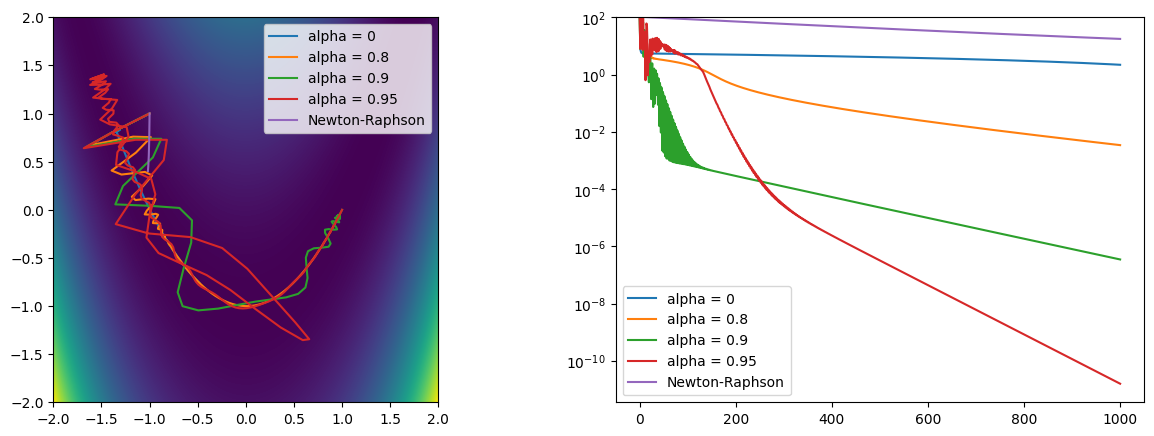

In [19]:
#Parameters
n = 1000 # Iterations
x_0 = np.array([-1,1])
u_0 = np.array([0,0]) # Initial condition
eps = 0.001
alphas = [0,0.8,0.9,0.95]

#Plot Function as image
a = b = np.arange(-2.0,2.0,0.001)
A,B = np.meshgrid(a,b)
result = Rosenbrock(A,B)
fig,(ax,ax2) = plt.subplots(1,2, figsize=(15,5))
im = ax.imshow(result, interpolation='bilinear', origin='lower', 
               extent=[-2,2,-2,2])
all_results = []
# Optimization with Gradient Descent + Momentum, 
# iterate over alpha values
for alpha in alphas:
    evaluation = np.zeros(n+1)
    x_0s = np.zeros(n+1)
    x_1s = np.zeros(n+1)
    x = x_0
    u = u_0
    evaluation[0] = Rosenbrock(x_0[0],x_0[1])
    x_0s[0] = x_0[0]
    x_1s[0] = x_0[1]
    for i in range(n):
        x,u = step_grad_desc_mom(x,u,eps,alpha)
        x_0s[i+1] = x[0]
        x_1s[i+1] = x[1]
        evaluation[i+1] = Rosenbrock(x[0],x[1])

    ax.plot(x_0s,x_1s,label="alpha = " + str(alpha))
    ax2.plot(evaluation, label="alpha = " + str(alpha))

# Optimization with Newton's Method
evaluation = np.zeros(n+1)
x_0s = np.zeros(n+1)
x_1s = np.zeros(n+1)
x = x_0
evaluation[0] = Rosenbrock(x_0[0],x_0[1])
x_0s[0] = x_0[0]
x_1s[0] = x_0[1]
for i in range(n):
    x = step_newton_raphson(x,eps)
    x_0s[i+1] = x[0]
    x_1s[i+1] = x[1]
    evaluation[i+1] = Rosenbrock(x[0],x[1])


ax.plot(x_0s,x_1s,label="Newton-Raphson")
ax2.plot(evaluation,label="Newton-Raphson")
ax.legend()
ax2.legend()
# Set y scale to logarithmic to better visualize the differences
ax2.set_yscale('log')
ax2.set_ylim(0,100)
plt.show()

Remarks: First of all, we assume there is a mistake in the implementation of Newton-Raphson or that it converges really slow. Unfortunately we couldn't find a mistake yet. For Gradient Descent with Momentum we observe a slow convergence without momentum and faster convergence with momentum. Also the "overshooting" effect of momentum is clearly visible in the form of "zigzagging". The effect increases for increasing alpha values.
